In [ ]:
models_dir = "models/PPO"
logdir = "logs"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

env = gym.make('Pendulum-v1')
env.reset()

model = PPO('MlpPolicy',
            env,
            gamma=0.99,                # discount factor
            ent_coef=0.01,             # entropy coefficient
            learning_rate=0.0003,
            verbose=1, 
            tensorboard_log=logdir)

TIMESTEPS = 10000

for i in range(1,500):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="PPO")
    model.save(f"{models_dir}/{TIMESTEPS*i}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/PPO_0
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.22e+03 |
| time/              |           |
|    fps             | 9842      |
|    iterations      | 1         |
|    time_elapsed    | 0         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.28e+03   |
| time/                   |             |
|    fps                  | 6571        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005012544 |
|    clip_fraction        | 0.0473      |
|    clip_range           | 0.

In [29]:
# Collect rewards during evaluation episodes
episode_rewards = []
env = gym.make('Pendulum-v1')
model = PPO.load('models/PPO/4990000')  # Load the last saved model (adjust if needed)
num_episodes = 500
for ep in range(num_episodes):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        if done or truncated:
            break
    episode_rewards.append(total_reward)
print('Episode rewards:', episode_rewards)

Episode rewards: [np.float64(-114.49324676900686), np.float64(-224.10560482648035), np.float64(-1.990455673716153), np.float64(-233.0544455456105), np.float64(-224.21169326565817), np.float64(-124.34308478181053), np.float64(-371.0064669307697), np.float64(-116.30950037671172), np.float64(-124.3966281540706), np.float64(-124.26782158417878), np.float64(-1.5291329850256017), np.float64(-120.32056831517102), np.float64(-118.99340406038208), np.float64(-360.04037872694977), np.float64(-119.29370087751398), np.float64(-118.25460188307135), np.float64(-216.7923113178917), np.float64(-0.8246049977347577), np.float64(-118.61474582296596), np.float64(-121.4269698299579), np.float64(-0.8251980402656), np.float64(-355.47341806556807), np.float64(-117.2333116119729), np.float64(-2.516080161085828), np.float64(-117.14819627030535), np.float64(-223.1273603046255), np.float64(-380.5369721378224), np.float64(-1.1085160514002417), np.float64(-0.1373455072026263), np.float64(-1.9505240889768587), np.fl

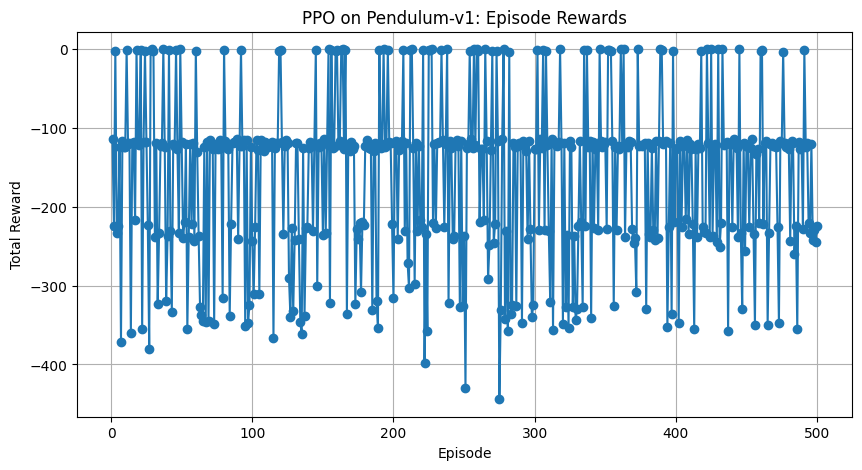

In [30]:
# Plot rewards vs episodes
plt.figure(figsize=(10,5))
plt.plot(range(1, len(episode_rewards)+1), episode_rewards, marker='o')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('PPO on Pendulum-v1: Episode Rewards')
plt.grid(True)
plt.show()

In [31]:
# Generate video of the trained agent
import imageio
video_frames = []
env = gym.make('Pendulum-v1', render_mode='rgb_array')
obs, _ = env.reset()
done = False
while not done:
    frame = env.render()
    video_frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    if done or truncated:
        break
env.close()
video_path = 'Pendulum_ppo_demo.mp4'
imageio.mimsave(video_path, video_frames, fps=30)
from IPython.display import Video
Video(video_path, embed=True, width=600, height=400)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
